# Overview


We will kick things off with an **in class** lecture on few more administrative things (the GitHub page + groups, handing in assignments, the structure of the class). 

It might seem boring to hear about admin, **but this is the stuff you need to know to do well in the class**. So I recommend showing up in class!

Then, we kick into gear and get started on the actual work. This week is about getting familiar with networks, and we'll focus on four main elements

* A short talk on the basic mathematical description of networks
* The `NetworkX` library 
* Matplotlib, binning, and plotting degree distributions
* Random networks

(The work-load is still a little bit light, since we want to allow those who are not super-strong at programming a bit of time to catch up. If you're bored and in need of extra work, let me know and I'll point you in the right direction.)

# Part 1: Basic mathematical description of networks

This week, let's start with some lecturing. I love networks, so I'll take some time today to tell you about them.

> **_Video Lecture_**. Then check out a few comments on "Network Notation" (don't worry it's short). 

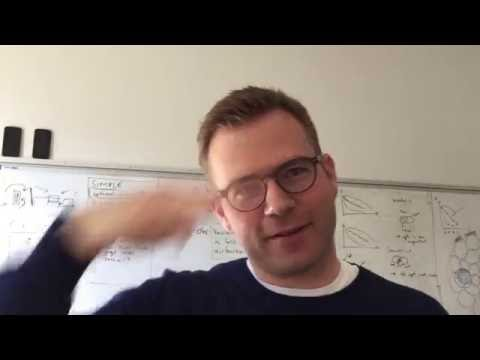

In [68]:
from IPython.display import YouTubeVideo
YouTubeVideo("MMziC5xktHs",width=800, height=450) # https://www.youtube.com/watch?v=MMziC5xktHs

Now for some reading

> _Reading_. We'll be reading the textbook _Network Science_ (NS) by Laszlo Barabasi. You can read the whole 
> thing for free [**here**](http://barabasi.com/networksciencebook/). 
>
> * Read chapter 2\.
> 

And the associated exercises

> *Exercises*: Chapter 2 in *Network Science*.
> 
> * Section 2.5 states that real networks are sparse. Can you think of a real network where each node has _many_ connections? Is that network still sparse? If yes, can you explain why?
> 
> There are more questions on Chapter 2 below.


SOL\
The network of connection between airport. All the big airport have regular flight to almost anywhere around the world, so each of these node has many connection, however, they still do not go world wide especcilly of you include domastic airports.


<div class="alert alert-block alert-info">
Just as last week, you might be tempted to use an LLM to come up with your answer. Don't! Remember what I said about the *illusion of knowledge* that you get when you take shortcuts. Don't fall into the trap. Think! Write down your own thoughts. And when you're done, you can use an LLM to make the answers better.
</div>


# Part 2: Exercises using the `NetworkX` library

Let's try to solve a few of the exercises from the book **using `NetworkX`**

> *Exercises*:
> 
> * Go to NS Section 2.12: Homework, then
>   * Write the solution exercise **2.1** (the 'Königsberg Problem') from NS in your `notebook`. 
>   * Solve exercise **2.3** ('Graph representation') from NS using `NetworkX` in your `notebook`. (You don't have to solve the last sub-question about *cycles of length 4* ... but I'll be impressed if you do it. One more thing on that last sub-exercise: It's easier to solve if you don't use `NetworkX`, but simple pen and paper).
>   * Solve exercise **2.5** ('Bipartite Networks') from NS using `NetworkX` in your `notebook`. *Important note*: There is a a mistake in the book. When it says "Block diagonal", they mean "Anti-block diagonal" (all elements are away from the diagonal blocks). 
>     - *Note*: For those without the physical book (and therefore no exercise numbers), the part "Bipartite Networks - General Considerations" does not need to be solved (the two last questions do not make much sense to me).

<div class="alert alert-block alert-info">
The "no-LLM" idea also applies here. The idea is to try to use NetworkX to solve some problems. Give it a shot on your own. You can ask your LLM for hints if you get stuck. But don't ask for the answer. Find it yourself 😎
</div>

### Exercise 2.1 Königsberg Problem

In [69]:
#Königsberg Problem
import networkx as nx
import matplotlib.pyplot as plt
grapha= nx.Graph()
grapha.add_edges_from([(1,2),(2,3),(2,4),(3,4),(4,1)])
graphb= nx.Graph()
graphb.add_edges_from(grapha.edges)
graphb.add_edge(3,1)
graphc = nx.Graph()
graphc.add_edges_from([(1,2),(1,12),(2,3),(3,4),(4,2),(4,5),(4,6),(5,6)
                       ,(6,7),(6,8),(7,8),(8,9),(8,10),(9,10),(10,11),
                       (10,12),(11,12),(12,2)])

graphd = nx.MultiGraph()
graphd.add_edges_from([(1,2),(2,3),(2,4),(4,5),(4,5),(4,5),(4,5),(4,5),(5,6)
                       ,(6,3)])
print(graphd .edges)



[(1, 2, 0), (2, 3, 0), (2, 4, 0), (3, 6, 0), (4, 5, 0), (4, 5, 1), (4, 5, 2), (4, 5, 3), (4, 5, 4), (5, 6, 0)]


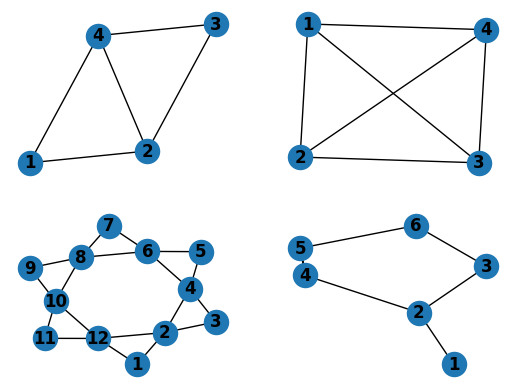

In [70]:
subax1 = plt.subplot(221)
nx.draw(grapha,with_labels=True, font_weight='bold')
subax2 = plt.subplot(222)
nx.draw(graphb,with_labels=True, font_weight='bold')
subax3 = plt.subplot(223)
nx.draw(graphc,with_labels=True, font_weight='bold')
subax4 = plt.subplot(224)
nx.draw(graphd,with_labels=True, font_weight='bold')

In [71]:
allGraphs = [grapha,graphb,graphc,graphd]
graphnumber =0
for graph in allGraphs:
    graphnumber+=1
    oddnode=0
    for n in graph.nodes:
        if graph.degree(n)%2!=0:
            oddnode+=1
    if oddnode>2:
        print(graphnumber)


2


### Exercise 2.3 Graph Representation

[(1, 2), (2, 3), (2, 4), (3, 2), (3, 1), (4, 1), (6, 1), (6, 3)]


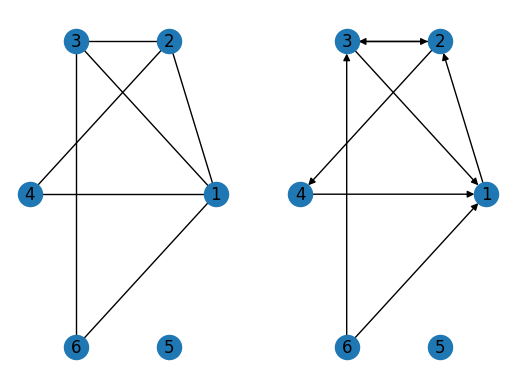

In [72]:
#Graph Representation
import numpy as np
mat_undir = np.array([[0,1,1,1,0,1],
                     [1,0,1,1,0,0],
                     [1,1,0,0,0,1],
                     [1,1,0,0,0,0],
                     [0,0,0,0,0,0],
                     [1,0,1,0,0,0]])

mat_dir   = np.array([[0,1,0,0,0,0],
                     [0,0,1,1,0,0],
                     [1,1,0,0,0,0],
                     [1,0,0,0,0,0],
                     [0,0,0,0,0,0],
                     [1,0,1,0,0,0]])

A_matrix_undir=nx.from_numpy_array(mat_undir)

A_matrix_dir=nx.from_numpy_array(mat_dir)

linked_list_undir =[(1,2),(1,3),(1,4),(1,6),(6,3),(2,4),(2,3)]
linked_list_dir =[(1,2),(2,3),(3,2),(3,1)
                  ,(4,1),(6,1),(6,3),(2,4)]

graph_undir= nx.Graph()
graph_undir.add_edges_from(linked_list_undir)
graph_undir.add_nodes_from([1,2,3,4,5,6])
graph_dir=nx.DiGraph()
graph_dir.add_edges_from(linked_list_dir)
graph_dir.add_nodes_from([1,2,3,4,5,6])

plt_undir= plt.subplot(121)
nx.draw_circular(graph_undir,with_labels=True)
plt_dir= plt.subplot(122)
nx.draw_circular(graph_dir,with_labels=True)

print(graph_dir.edges)

In [73]:
print("clustring for the undirected graph is: ", nx.clustering(graph_undir))
print("clustring for the directed graph is: ", nx.clustering(graph_dir))

print("old labiles of linked list: ", graph_undir.edges)
mapping = {0:0,1:1,2:2,3:3,4:4,5:6,6:5}
new = nx.relabel_nodes(graph_undir, mapping)
print("new labiles of linked list: ", new.edges)




clustring for the undirected graph is:  {1: 0.5, 2: 0.6666666666666666, 3: 0.6666666666666666, 4: 1.0, 6: 1.0, 5: 0}
clustring for the directed graph is:  {1: 0.3333333333333333, 2: 0.3, 3: 0.3, 4: 0.5, 6: 0.5, 5: 0}
old labiles of linked list:  [(1, 2), (1, 3), (1, 4), (1, 6), (2, 4), (2, 3), (3, 6)]
new labiles of linked list:  [(1, 2), (1, 3), (1, 4), (1, 5), (2, 4), (2, 3), (3, 5)]


What kind of information can you not infer from the link list representation of the network that you can infer from the adjacency matrix?
- segmentation of the graph, wieghts degree of the nodes\

In the (a) network, how many paths (with possible repetition of nodes and links) of length 3 exist starting from node 1 and ending at node 3? And in (b)
- in a from node 1, 1-3-1-3, 1-4-2-3, 1-2-1-3, 1-6-1-3,1-4-1-3
- in b there are 0 in distance of 3 you can get there in 2 or 4. 

### Exercise 2.5 Bipartite Networks

In [74]:
bi_graph= nx.Graph()
Bi_purple = [1,2,3,4,5,6]
Bi_green = [7,8,9,10,11]
Bi_edges = [(1,7),(2,9),(3,7),(3,8),(3,9),(4,9),(4,10),(5,9),(5,11),(6,11)] 
bi_graph.add_nodes_from(Bi_purple,bipartite=0)
bi_graph.add_nodes_from(Bi_green,bipartite=1)
bi_graph.add_edges_from(Bi_edges)

print(np.array(nx.adjacency_matrix(bi_graph).todense()))


[[0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0]]


**Construct its adjacency matrix. Why is it a block-diagonal matrix**\
Assuming the rows and colums are ordered in group1 then 2, since group 1 nodes can not connect to nodes in the same group that block will be 0\
**Construct the adjacency matrix of its two projections, on the purple and on the green nodes, respectively.**

In [75]:
projection_green= nx.bipartite.projected_graph(bi_graph,Bi_green)
projection_purple= nx.bipartite.projected_graph(bi_graph,Bi_purple)
ad_mat_proj_green = nx.adjacency_matrix(projection_green)
ad_mat_proj_purple = nx.adjacency_matrix(projection_purple)


In [76]:
avg_degree_green = 0
avg_degree_purple = 0
for node in Bi_green:
    avg_degree_green+= bi_graph.degree(node)
avg_degree_green= avg_degree_green/len(Bi_green)

for node in Bi_purple:
    avg_degree_purple+= bi_graph.degree(node)
avg_degree_purple= avg_degree_purple/len(Bi_purple)

print("Green: ", avg_degree_green, "Purple: ", avg_degree_purple)

Green:  2.0 Purple:  1.6666666666666667


In [77]:
#average degree
avg_degree_green_proj=(sum(dict(projection_green.degree()).values()))/len(projection_green.nodes)
avg_degree_purple_proj=(sum(dict(projection_purple.degree()).values()))/len(projection_purple.nodes)
print("Green: ", avg_degree_green_proj, "Purple: ", avg_degree_purple_proj)

#it is not suprising consider a bibipartite network where one side (a) has x>>2 nodes and the other 
# only has 2(b). the projection of b can have a max of 1 edge, however in the orginal it can have many more   

Green:  2.0 Purple:  2.6666666666666665


> **_Video Lecture_**: Once again, it's time to stop working for a couple of minutes to hear me talk about plotting with `NetworkX`. 
> 

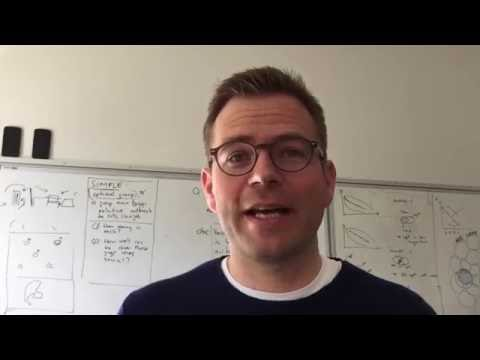

In [78]:
YouTubeVideo("iDlb9On_TDQ",width=800, height=450) # https://www.youtube.com/watch?v=iDlb9On_TDQ

# Part 3: Plotting degree distributions

As always we'll learn about degree-distribution plotting by creating a `notebook` and trying it out. 

As a little public service announcement about this exercise: I know that you've probably tried binning data before. And that there are many functions designed to make binning easy, so there is a good chance that you think that binning data into bins is something that you don't have to worry about.

**BUT** ... with this exercise, I aim to convince you that binning isn't always trivial. And that there are key things to think about every time you need to put data into buckets. So please read the exercise carefully. And follow my instructions carefully.

<div class="alert alert-block alert-info">
As I hint right above, this exercise is about you discovering nuances of binning: How defining bins that fit the data is important. How the first and last bin can sometimes be tricky. You won't discover that if you get help, so again I encourage you to try it all on your own.
</div>

> 
> *Exercises*:
> 
> Begin by importing the right packages. Start by importing `matplotlib.pyplot` (for plotting), `numpy` (for binning and other stuff), 
> `random` (for generating random numbers), and `networkx` (for generating networks.)
> 
> * Binning real numbers
>   * Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.
>   * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
>   * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.
> * Binning integers
>   * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
> Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out 
> `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution 
> characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 
>   * Instead of simply specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. 
> Create a vector $v$
> that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, 
> and the last bin contains the maximum number. 
> Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. 
> What is the sum over bin counts? Explain how the binning-vectors first and last element 
> relates to the min and max from the Poisson distribution.
>   * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution 
> * Binning and plotting degree distributions. 
>   * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
> First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
> **Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average 
> degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.
>   * Now, use `networkx` to create the graph and extract the degree distribution.
>   * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.
> 

### Exercise Binning real numbers

(array([   3.,   35.,  215.,  732., 1353., 1420.,  864.,  308.,   59.,
          11.]),
 array([1.50784068, 1.60395734, 1.70007401, 1.79619068, 1.89230734,
        1.98842401, 2.08454068, 2.18065734, 2.27677401, 2.37289068,
        2.46900734]),
 <BarContainer object of 10 artists>)

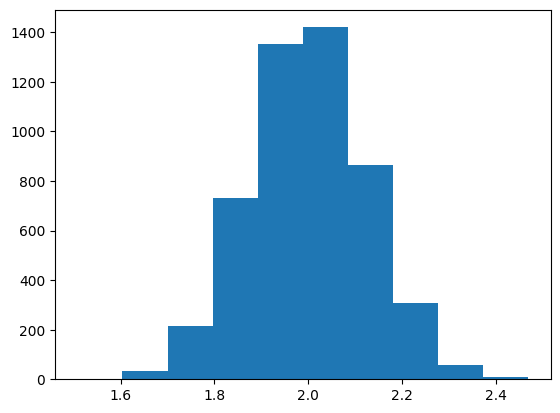

In [79]:
import random
random.seed(42)
randomData=[]
for i in range(5000):
    randomData.append(random.gauss(2,0.125))

np.histogram(randomData,10)
# output 2 arrays 1 is the number of data in each bin. the second is the ranges
# if bins is: [1, 2, 3, 4] then the first bin is [1, 2) (including 1, but excluding 2) 
# and the second [2, 3). The last bin, however, is [3, 4], which *includes* 4.
plt.hist(randomData,10)
##???????????

### Exercise Binning integers

(array([  1,  15,  39,  85, 179, 320, 468, 574, 619, 609, 560, 466, 399,
       238, 154, 121,  76,  41,  20,   9,   4,   1,   2]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]))


<BarContainer object of 24 artists>

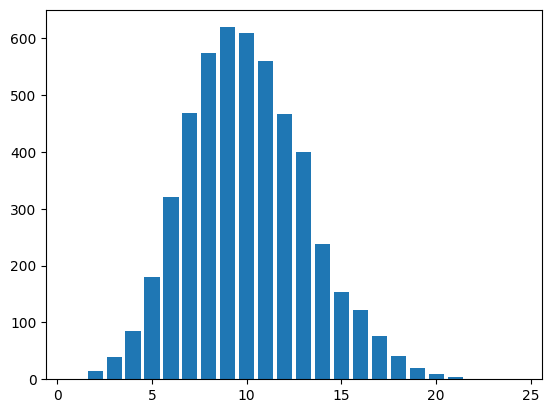

In [80]:
np.random.seed(42)
possionData=np.random.poisson(10,5000)
max(possionData) #24
min(possionData)#1
v=[i for i in range(1,25)]
sum(np.histogram(possionData,v)[0])
print(np.histogram(possionData,v))
# for i in range(25):
#     print( possionData.tolist().count(i))
# For some reason the occurances of 23 and 24 are summed as a last digit so we fix that
plt.bar([x for x in range(1,25)],np.histogram(possionData,v)[0].tolist()[:-1]+[1,1])



### Exercise Binning and plotting degree distributions

24 4999


<BarContainer object of 5000 artists>

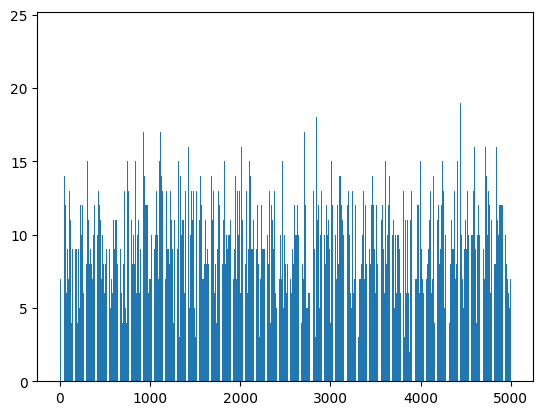

In [81]:
p=10/(5000-1)
Er=nx.erdos_renyi_graph(5000,p, seed=42)
# nx.draw_circular(Er)
# Er.degree
dictDegree= {Node:degree for (Node,degree) in Er.degree}
print(max(dictDegree.values()),max(dictDegree.keys()))

plt.bar(dictDegree.keys(),dictDegree.values())

# Part 4: Random networks

> **_Video Lecture_**. Now it's time to relax and watch a few minutes of info on _Random Networks_. 

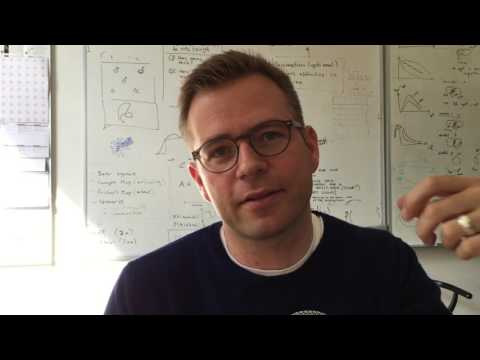

In [82]:
YouTubeVideo("c_SbQCzgqb0",width=800, height=450) # https://www.youtube.com/watch?v=c_SbQCzgqb0

> _Reading_. Read section 3.1-3.7 (the most important part is 3.1-3.4) of Chapter 3 of _Network Science_. You can find the entire book [**here**](http://barabasi.com/networksciencebook/).


> _Exercises_ (should be completed in a `notebook`):
> 
> * Work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.
> * Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
>   * Extract the Giant Connected Component, GCC. (Hint: You can use `networkx.connected_component_subgraphs` <- it works in ealier versions of NetworkX (<2.5) || Otherwise, you can use `nx.connected_components(G)` and `G.subgraph(c).copy()`)
>   * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
>   * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
>   * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.
> 

<div class="alert alert-block alert-info">
For this exercise, I think you should solve the technical parts on your own (see above for reasons), but it's totally OK to use your LLM to make the plot look better!
</div>

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

* Work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.\
Erdős-Rényi Networks\
Consider an Erdős-Rényi network with N = 3,000 nodes, connected to each other with probability p = 10–3\
1. What is the expected number of links, 〈L〉?\
$<L>=\frac{pN(N-1)}{2}=\frac{10^{-3}*3000*(3000-1)}{2} = 4498.5$

2. In which regime is the network?\
first we need to find \<k\>\
$<k>=p(N-1)=10^{-3}*(3000-1)=2.99$
since \<k\> is \> ln(N) (which is 8.006) it is in the Supercritical Regime


3. Calculate the probability pc so that the network is at the critical point\
$p_c=\frac{1}{N-1}=\frac{1}{3000-1}=0.00033344$




4. Given the linking probability p = $10^{–3}$, calculate the number of nodes $N^{cr}$ so that the network has only one component.\
This happens in Connected Regime where ‹k› › ln N and p› ln N/N 
<!-- $<k>=1=p(N-1)=10^{-3}*(N-1)\rightarrow \frac {1}{p}+1 = 1001.0$ -->
$N=9119$ 


5. For the network in (4), calculate the average degree 〈kcr〉 and the average distance between two randomly chosen nodes 〈4〉.\
$<k>=p(N-1)= 10^{-3}*(9119-1)=9.118$\
average distance between two randomly chosen nodes assuming that the network has only one component 
$<d>=\frac{\ln N}{ln <k>}= 4.1253765141334044$

6. Calculate the degree distribution pk of this network (approximate with a Poisson degree distribution).

using the equation $p_k= e^{-<k>\frac {<k>^k}{k!}}$

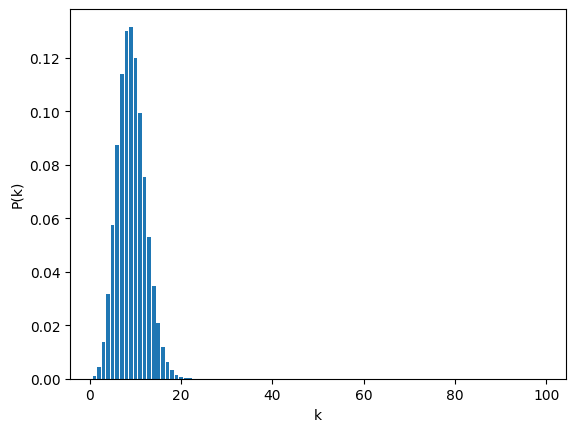


In [83]:
import math
import matplotlib.pyplot as plt
p=10**(-3)
n=3000
print("L",str(p*n*(n-1)/2))
print("K",p*(n-1))
print("ln n",math.log(n))
print("Supercritical",1/n<p)
print("pc",1/(n-1))
print("k for one giant component",1/p+1)
n_4 = 2
while (p<=math.log(n_4)/n_4) and (math.log(n_4)> p*(n_4-1)):
    n_4+=1
print("n for one component ", n_4)
print("K for one component ",p*(n_4-1))
print("average distance",math.log(n_4)/math.log(p*(n_4-1)))
dis ={}
k_4 = p*(n_4-1)
for k in range(1,100):
    first=k_4**k
    second = math.factorial(k)
    dis.update({k: math.exp(-k_4)*first/second})
print(dis)
# plt.bar(dis.keys(),dis.values())
# plt.xlabel("k")
# plt.ylabel("P(k)")


L 4498.5
K 2.999
ln n 8.006367567650246
Supercritical True
pc 0.00033344448149383126
k for one giant component 1001.0
n for one component  9119
K for one component  9.118
average distance 4.1253765141334044
{1: 0.0010000057607899796, 2: 0.004559026263441518, 3: 0.013856400490019918, 4: 0.031585664917000406, 5: 0.057599618542641944, 6: 0.08753222031196821, 7: 0.11401696925778945, 8: 0.12995084071156554, 9: 0.13165464062311716, 10: 0.12004270132015825, 11: 0.09950448642156391, 12: 0.0756068255993183, 13: 0.05302946429342957, 14: 0.03453733253053506, 15: 0.020994093200894577, 16: 0.0119640088628598, 17: 0.006416931341856215, 18: 0.0032505322208358314, 19: 0.0015599133047147953, 20: 0.0007111644756194751, 21: 0.00030878084231897025, 22: 0.00012797562364838048, 23: 5.073398854025797e-05, 24: 1.9274687812919676e-05, 25: 7.0298641391280645e-06, 26: 2.465319277714219e-06, 27: 8.325474508962314e-07, 28: 2.711131306168514e-07, 29: 8.524170775739486e-08, 30: 2.5907796377730876e-08, 31: 7.62023507

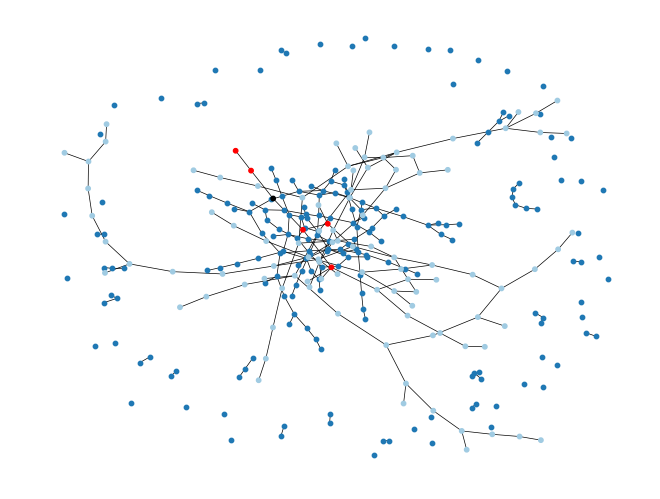

In [109]:
'''
Plot a random network with 200 nodes and an average degree of 1.5
'''
p = 1.5/(200-1)
net = nx.erdos_renyi_graph(200, p, seed=42)
nx.draw(net, node_size=10, with_labels=False, width=0.5)

'''
Extract the Giant Connected Component, GCC.
'''
gcc = max(nx.connected_components(net), key=len)

'''
Choose a node at random from the GCC.
'''
node = random.choice(list(gcc))

'''
Find all nodes that are precisely 2 steps away from that node.
'''
nodes = set(nx.single_source_shortest_path_length(net, node, cutoff=2).keys())

'''
Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). 
The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`).
'''
colors = ["#000000" if n == node else "#ff0000" if n in nodes else "#A0CBE2" for n in gcc]
nx.draw(nx.subgraph(net, gcc), node_size=10, with_labels=False, width=0.5, node_color=colors)

